# Hudson Arney
## Problem Set 5 - Logistic Regression

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
import sklearn.datasets
import scipy

In [2]:
file_path = "C:/Users/arneyh/CSC 5601 - Theory of Machine Learning/Assignments/Week 5/Data/"

results_data = pd.read_csv(file_path + "results.csv", header=None)

iris_df = pd.read_csv(file_path + "IRIS.csv")  

In [3]:
results_data = results_data.rename(columns={0: 'X', 1: 'y'})
results_data.head()

,X,y
0,0.99348,1
1,0.87742,0
2,0.91694,0
3,0.99419,1
4,0.99394,1


In [4]:
#X = results_data['X']
#y = results_data['y']
iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
dir(iris)
print(f"X shape: {X.shape}")

X = iris.data
y = iris.target

X shape: (150, 2)


In [5]:
cls = np.unique(y)
print(f"{cls=}")

cls=array([0, 1, 2])


[4.3 7.9]


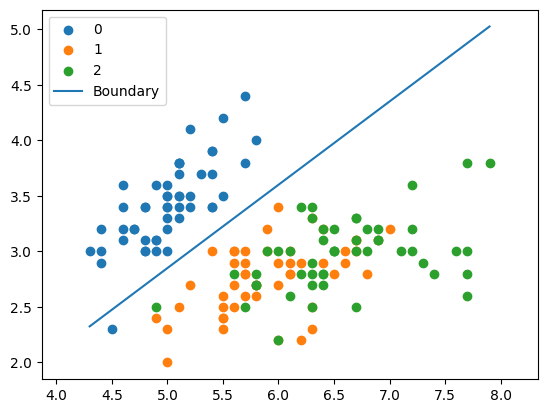

In [6]:
for c in cls:
    plt.scatter(X[y==c, 0], X[y==c, 1], label=f"{c}")
xr = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
print(xr)
yb = 0.75 * xr - 0.9
plt.plot(xr, yb, label="Boundary")
plt.gca().axis('equal')
plt.legend()
plt.show()

In [7]:
A = np.array([[3/4, -1], [-4/3, -1]]) # See README and Pictures for the matrix numbers
nb = -(X[:,1] + 4/3 * X[:,0])
print(nb[:5])
b = np.array([0.9, -10.3])

[-10.3         -9.53333333  -9.46666667  -9.23333333 -10.26666667]


In [16]:
b_mat = np.vstack((np.ones((1, nb.size)) * 0.9, nb))
print(f"{b_mat.shape=}")
print(b_mat[:,:5])

b_mat.shape=(2, 150)
[[  0.9          0.9          0.9          0.9          0.9       ]
 [-10.3         -9.53333333  -9.46666667  -9.23333333 -10.26666667]]


In [17]:
x_proj = np.linalg.solve(A, b_mat)
print(f"{x_proj.shape=}")
print(x_proj[:,:5])

x_proj.shape=(2, 150)
[[5.376 5.008 4.976 4.864 5.36 ]
 [3.132 2.856 2.832 2.748 3.12 ]]


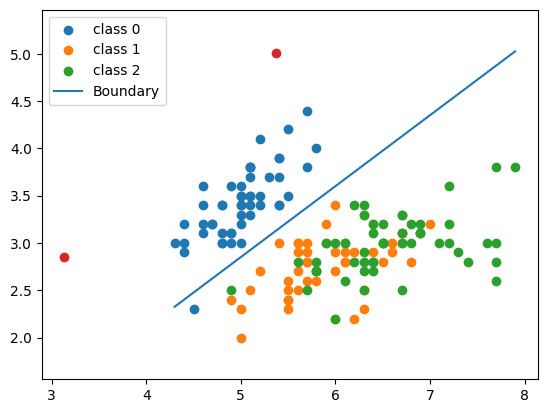

In [18]:
for c in cls:
    plt.scatter(X[y==c, 0], X[y==c, 1], label=f"class {c}")
plt.plot(xr, yb, label="Boundary")
plt.scatter(x_proj[:, 0], x_proj[:, 1])
plt.gca().axis('equal')
plt.legend()
plt.show()

In [27]:
#print(X.shape, x_proj.shape)
V = X - x_proj.T
print(f"{V.shape=}")
d = np.linalg.norm(V, axis=1)
print(d)

(150, 4) (2, 150)


ValueError: operands could not be broadcast together with shapes (150,4) (150,2) 

NameError: name 'V' is not defined

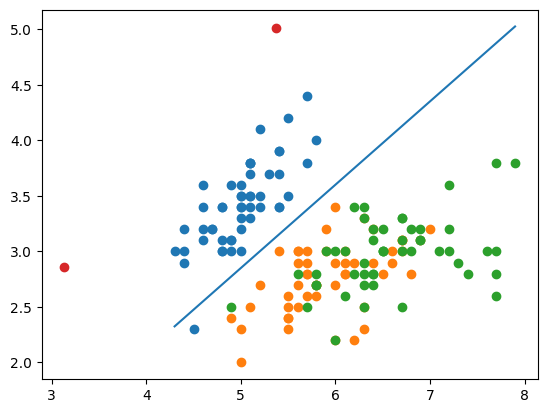

In [20]:
for c in cls:
    plt.scatter(X[y==c, 0], X[y==c, 1], label=f"class {c}")
plt.plot(xr, yb, label="Boundary")
plt.scatter(x_proj[:, 0], x_proj[:, 1])
plt.quiver(x_proj[0,:], x_proj[1,:], V[:, 0], V[:, 1], d, angles='xy', scale_units='xy', scale=1)
plt.gca().axis('equal')
plt.legend()
plt.show()

In [ ]:
sgd = sklearn.linear_model.SGDClassifier(loss='log_loss')
y2 = y.copy()
y2[y2==2] = 1
sgd.fit(X, y2)
pred_labels = sgd.predict(X)
pred_prob = sgd.predict_proba(X)

In [ ]:
print(pred_labels[:5])
print(pred_prob[:5])

[0 0 0 0 0]
[[1.00000000e+00 3.46895930e-14]
 [1.00000000e+00 4.13454403e-10]
 [1.00000000e+00 6.97075984e-13]
 [9.99999999e-01 1.21933689e-09]
 [1.00000000e+00 5.71587255e-15]]


In [21]:
#plt.scatter(y2, pred_prob)

In [22]:
plt.scatter(d, pred_prob[:, 0])

NameError: name 'd' is not defined

In [23]:
sgn = np.sign(np.dot(V, [3, 4]))
d_sgn = d * sgn
print(d_sgn)

NameError: name 'V' is not defined

In [24]:
plt.scatter(d_sgn, pred_prob[:, 0])

NameError: name 'd_sgn' is not defined

In [26]:
r_result = scipy.stats.pearsonr(d_sgn, pred_prob[:, 0])
print(r_result)

NameError: name 'd_sgn' is not defined